In [20]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline
%run function.ipynb

df = pd.read_csv('clean6.csv')
df_copy = df.copy()
print(df_copy.shape)
df_copy.head(3)

(894207, 48)


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,ApprovalDate,Term,NoEmp,...,OccupiedHousingUnits,MedianHomeValue,MedianHouseholdIncome,DisbursePerEmployee,GrSBA_AppvDiff%,State_division,USDPerJobCreated,loan_marturity_date,Is_Cross_State,Appv_Dusburse_delta
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,1997-02-28,84.0,4.0,...,12895.0,115600.0,48618.0,12000.000000,20.0,Mid-West,NaN,2004-02-28,1,730.0
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,1997-02-28,60.0,2.0,...,10938.0,120200.0,47863.0,13333.333333,20.0,Mid-West,NaN,2002-02-28,0,92.0
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,1997-02-28,180.0,7.0,...,17562.0,207900.0,45415.0,35875.000000,25.0,Mid-West,NaN,2012-02-28,0,306.0


In [3]:
obj_features = ['State', 'BankState', 'NewExist', 'IsFranchised', 'UrbanRural', 'RevLineCr', 'LowDoc', 'Industry',
            'ApprovalDate_year', 'ApprovalDate_month', 'DisbursementDate_year', 'DisbursementDate_month', 'State_division']
num_features = ['Default', 'ChgOffPrinGr', 'Term', 'DisbursementGross', 'GrSBA_AppvDiff%', 'DisbursePerEmployee',
                'USDPerJobCreated','NoEmp', 'CreateJob', 'RetainedJob', 'Population', 'PopDensity', 'GrAppv', 'SBA_Appv',
                'HousingUnits', 'OccupiedHousingUnits', 'MedianHomeValue', 'MedianHouseholdIncome']
time_cols = ['ApprovalDate_year', 'ApprovalDate_month', 'DisbursementDate_year', 'DisbursementDate_month']

df_groupby_mean = dict()
df_groupby_size = dict()
df_groupby_sum = dict()

for col in obj_features:
    df_groupby_mean[col] = df_copy.groupby(by=col).mean()[num_features]
    df_groupby_sum[col] = df_copy.groupby(by=col).sum()[num_features]
    df_groupby_size[col] = pd.DataFrame(df_copy.groupby(by=col).size())
    df_groupby_size[col].rename(columns={0: 'size'}, inplace=True)

In [8]:
# df_groupby_mean['State'].to_csv('State_mean.csv')
# df_groupby_mean['BankState'].to_csv('BankState_mean.csv')
# df_groupby_sum['State'].to_csv('State_sum.csv')
# df_groupby_sum['BankState'].to_csv('BankState_sum.csv')

# UrbanRural Undefined

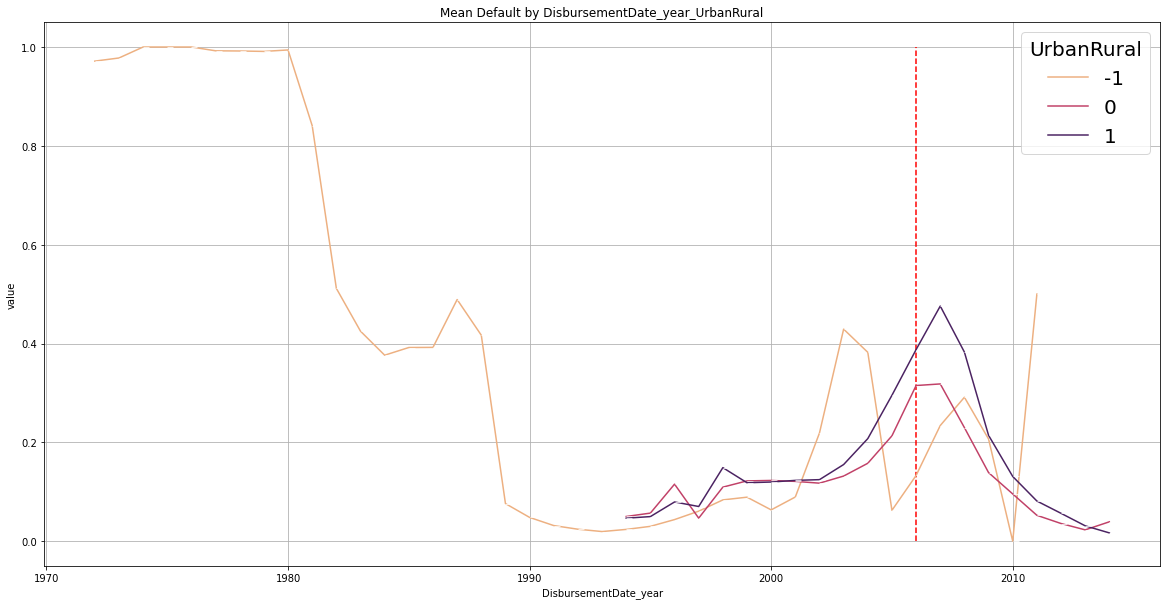

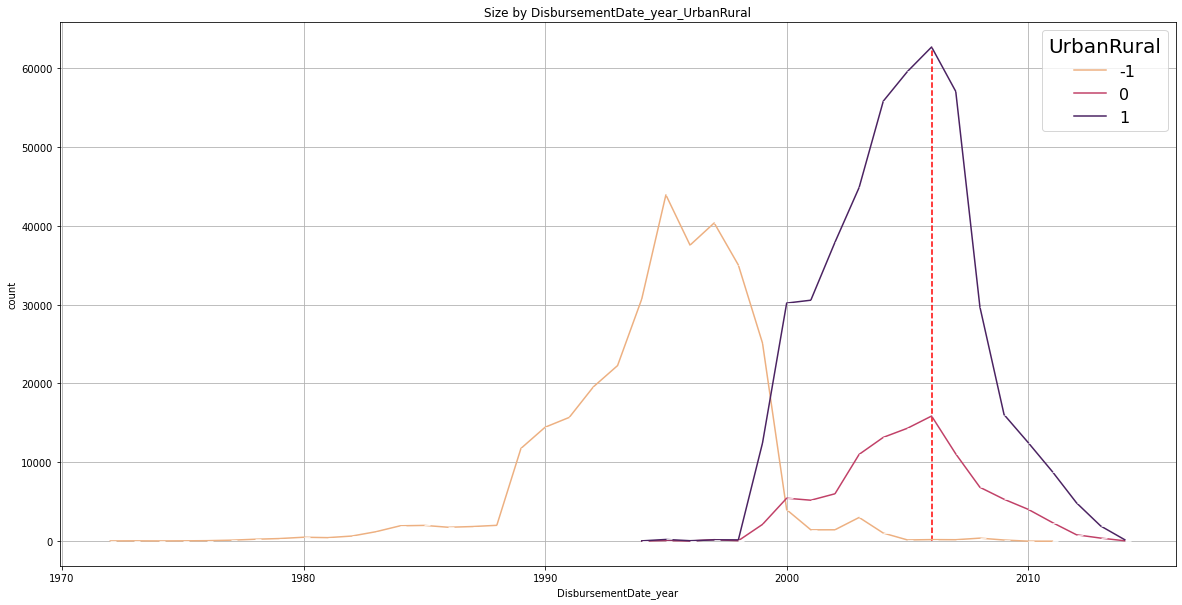

In [6]:
# UrbanRural延伸分析

data = df_copy.groupby(by=['DisbursementDate_year', 'UrbanRural']).mean()
data_long = data.melt(ignore_index=False).reset_index()
data_def = data_long[data_long['variable'] == 'Default']

data_def = data_def[data_def['DisbursementDate_year'] >= 1972]
data_def[['DisbursementDate_year', 'UrbanRural']] = data_def[['DisbursementDate_year', 'UrbanRural']].applymap(lambda x: int(x))

year_list = list(df_groupby_mean['ApprovalDate_year'][~(df_copy.groupby(by='ApprovalDate_year').size().values < 30)].index)

data = pd.DataFrame(df_copy.groupby(by=['DisbursementDate_year', 'UrbanRural']).size()).reset_index()
data.rename(columns={0: 'count'}, inplace=True)
data = data[data['DisbursementDate_year'] >= 1972]
data[['DisbursementDate_year', 'UrbanRural']] = data[['DisbursementDate_year', 'UrbanRural']].applymap(lambda x: int(x))

plt.figure(figsize=(20,10))

num = 'Default'

plt.title('Mean {} by DisbursementDate_year_UrbanRural'.format(num))
plt.grid(True)
plt.vlines(x=[2006.0], ymin=data_def['value'].min(), ymax=data_def['value'].max(), color='r', linestyles='dashed')
sns.lineplot(data=data_def, x=data_def['DisbursementDate_year'], y=data_def['value'], marker=True, hue='UrbanRural',
             palette="flare")
plt.savefig('Mean {} by DisbursementDate_year_UrbanRural.jpeg'.format(num))
plt.legend(title='UrbanRural', fontsize=20, title_fontsize=20)

plt.figure(figsize=(20,10))
plt.title('Size by DisbursementDate_year_UrbanRural'.format(num))
plt.grid(True)
plt.vlines(x=[2006.0], ymin=data['count'].min(), ymax=data['count'].max(), color='r', linestyles='dashed')
sns.lineplot(data=data, x=data['DisbursementDate_year'], y=data['count'], marker=True, hue='UrbanRural',
             palette="flare")
plt.savefig('Size by DisbursementDate_year_UrbanRural.jpeg')
plt.legend(title='UrbanRural', fontsize=16, title_fontsize=20)

plt.show()

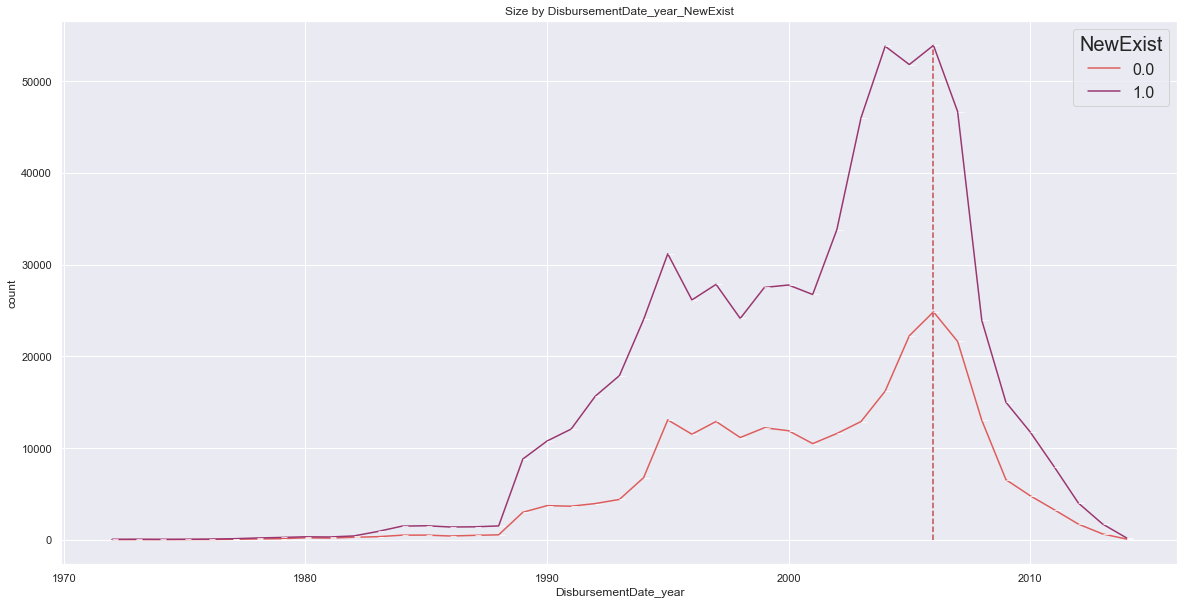

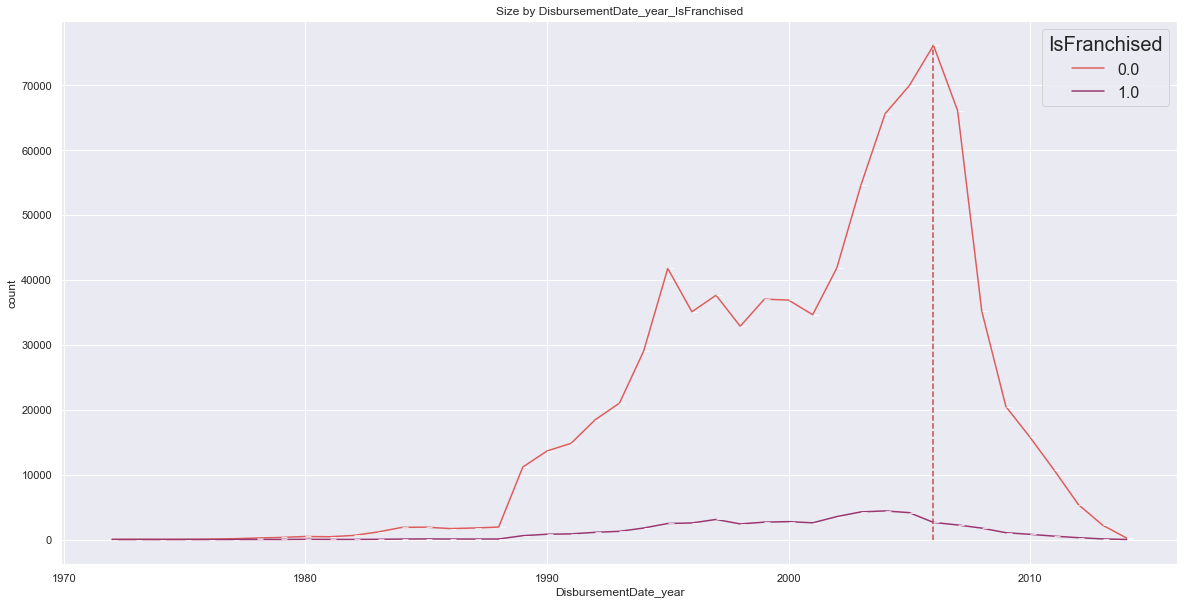

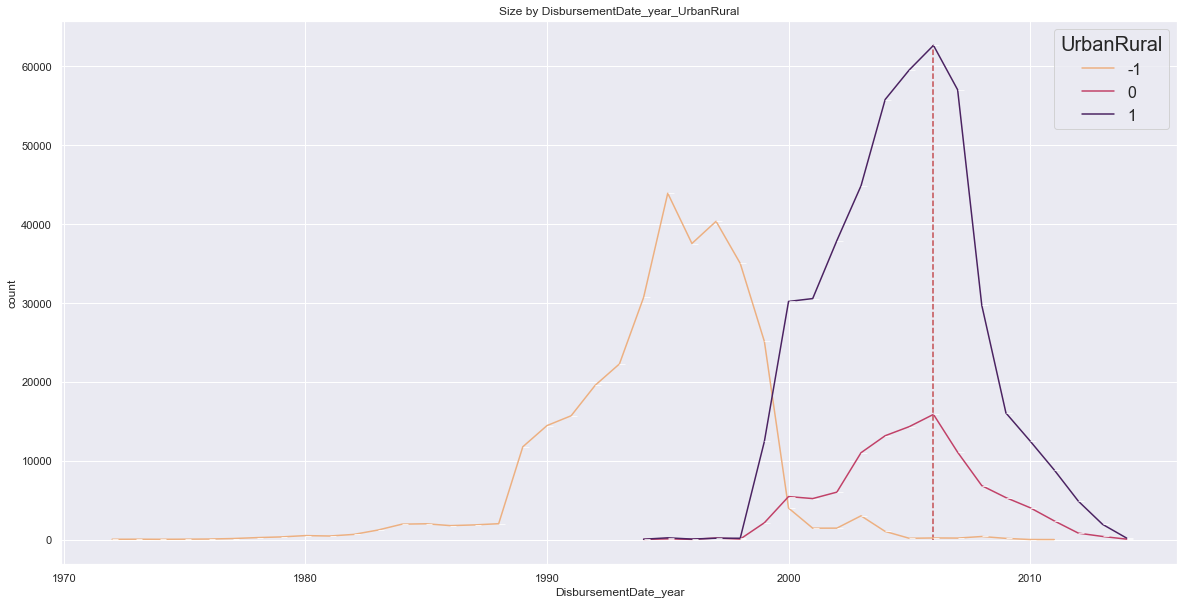

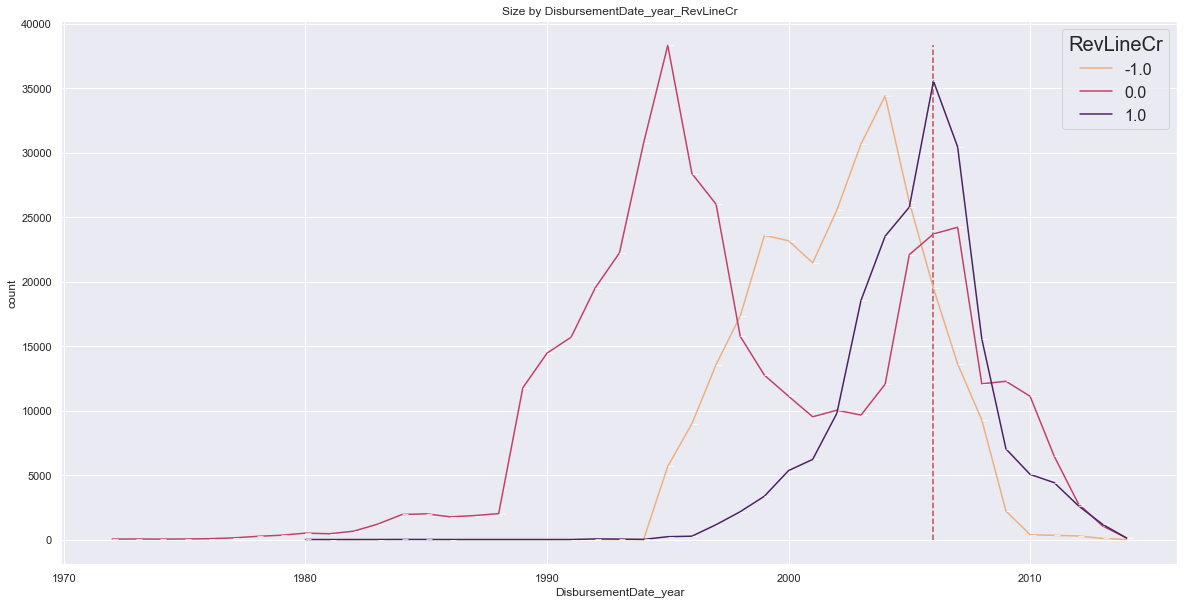

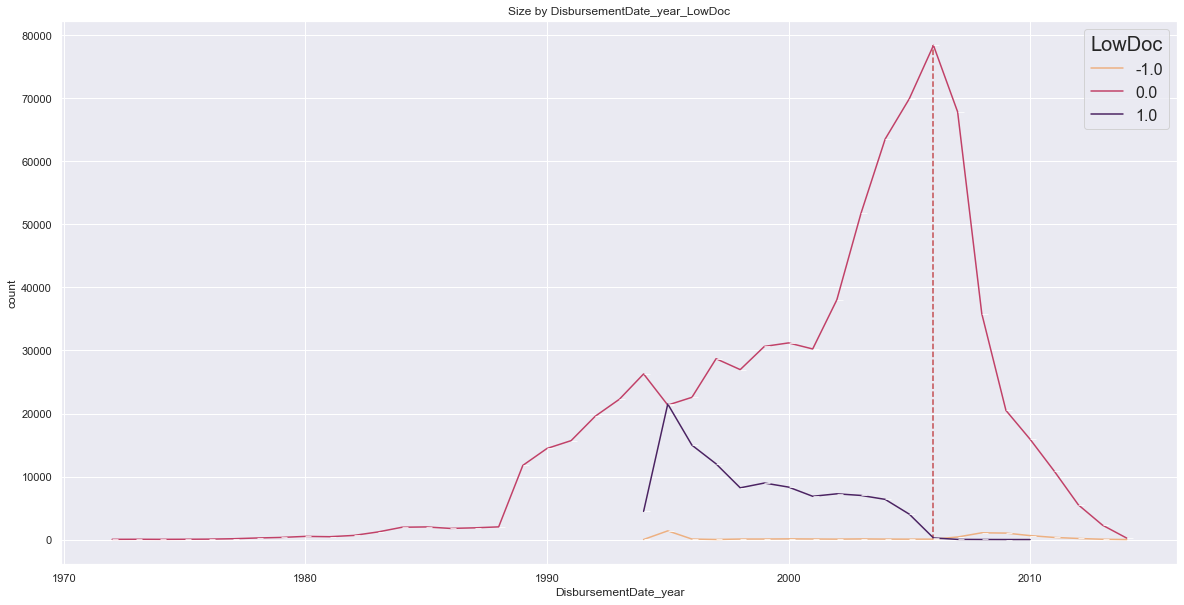

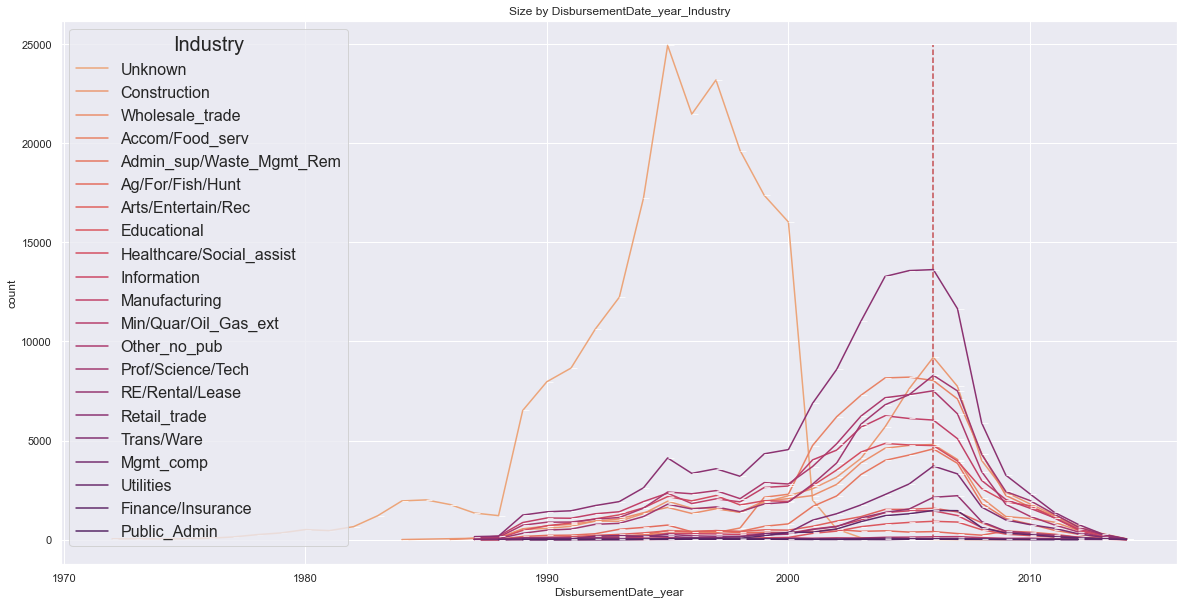

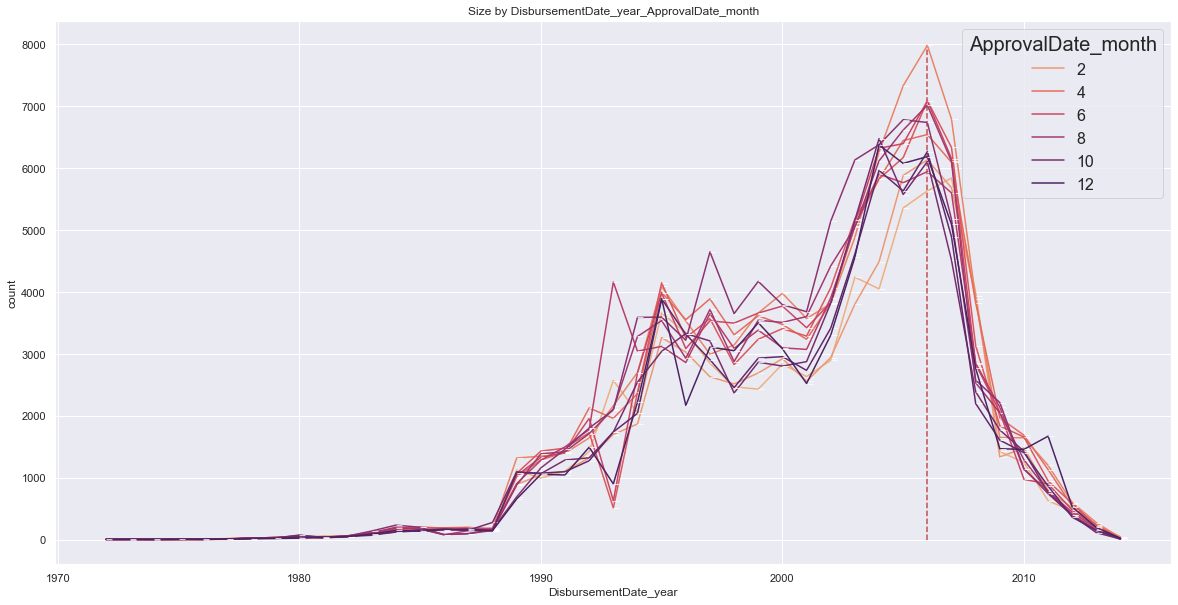

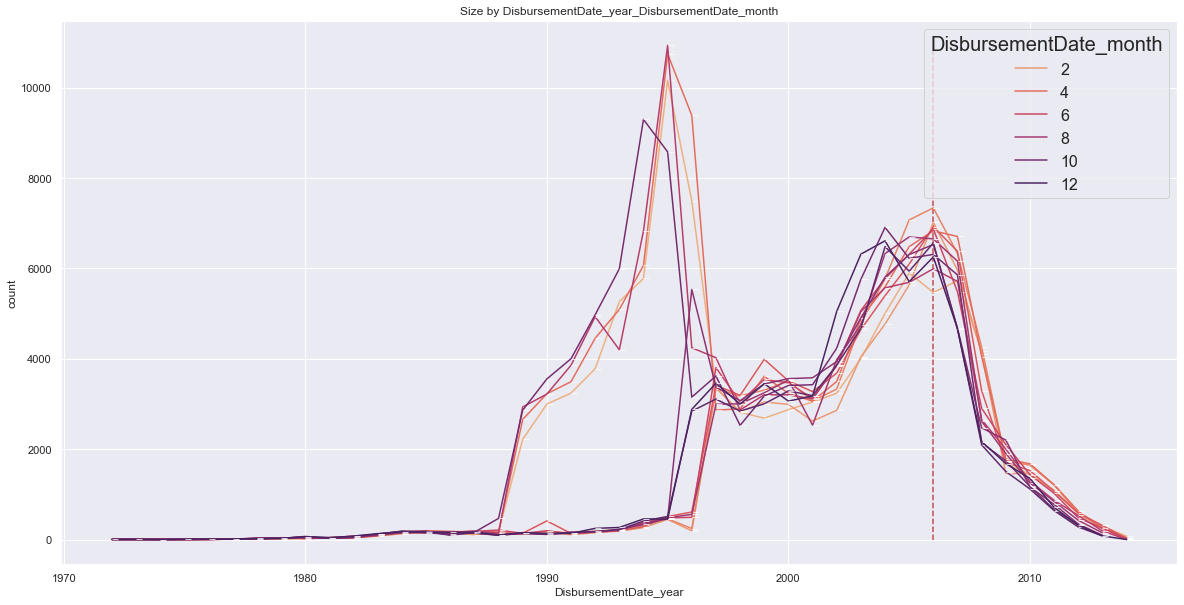

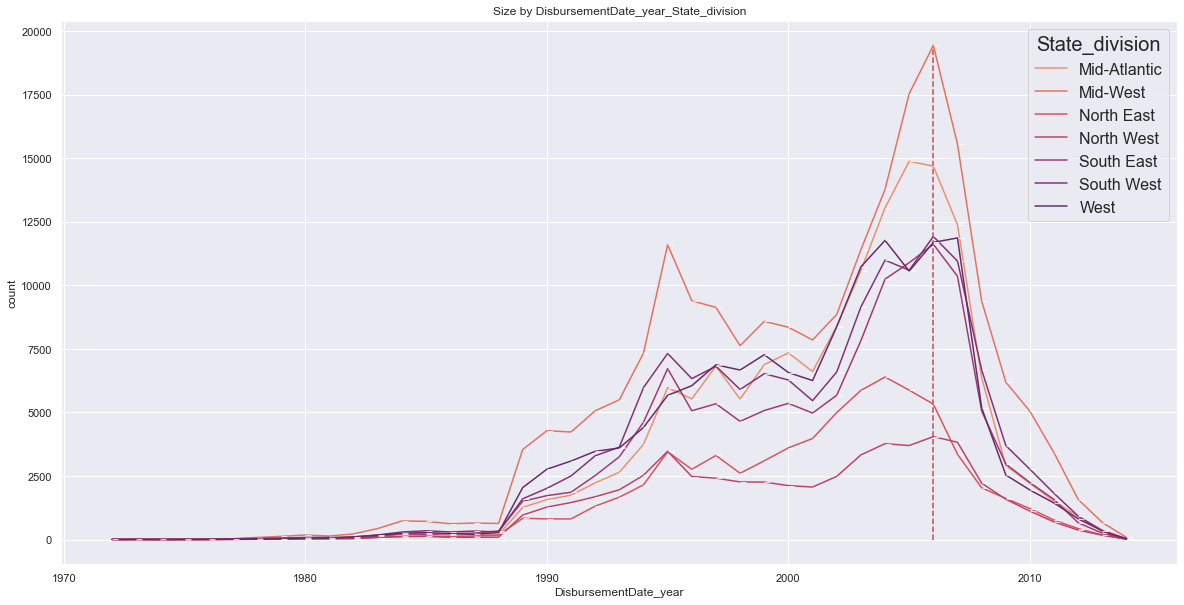

In [21]:
size_hue_disbursementyear(df_copy, hue_cols=obj_features, year_col='DisbursementDate_year')

In [28]:
%run function.ipynb

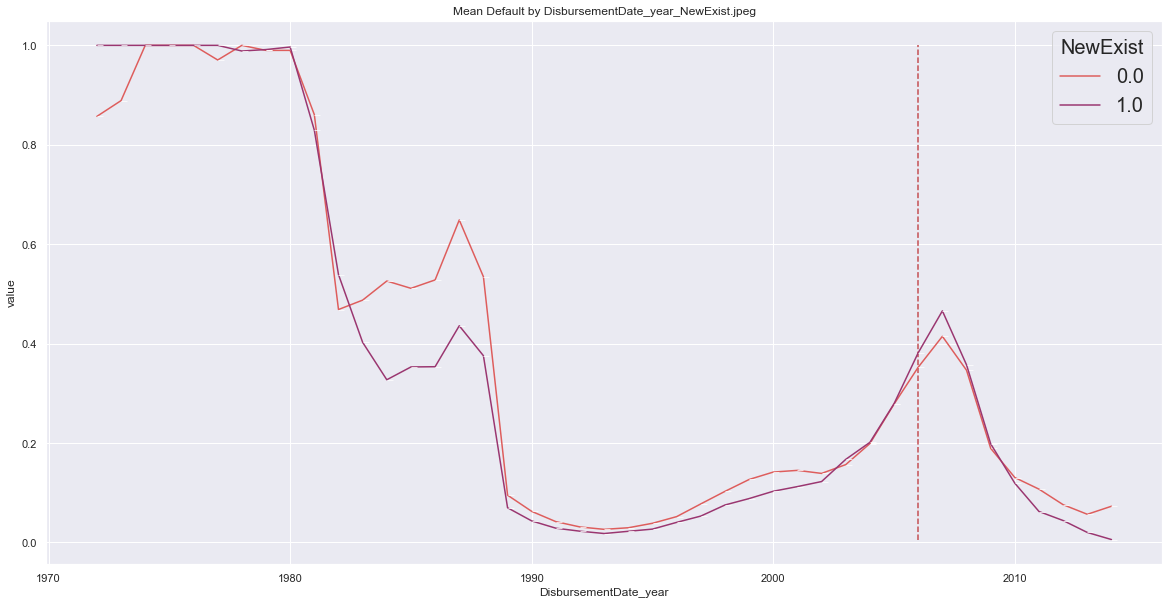

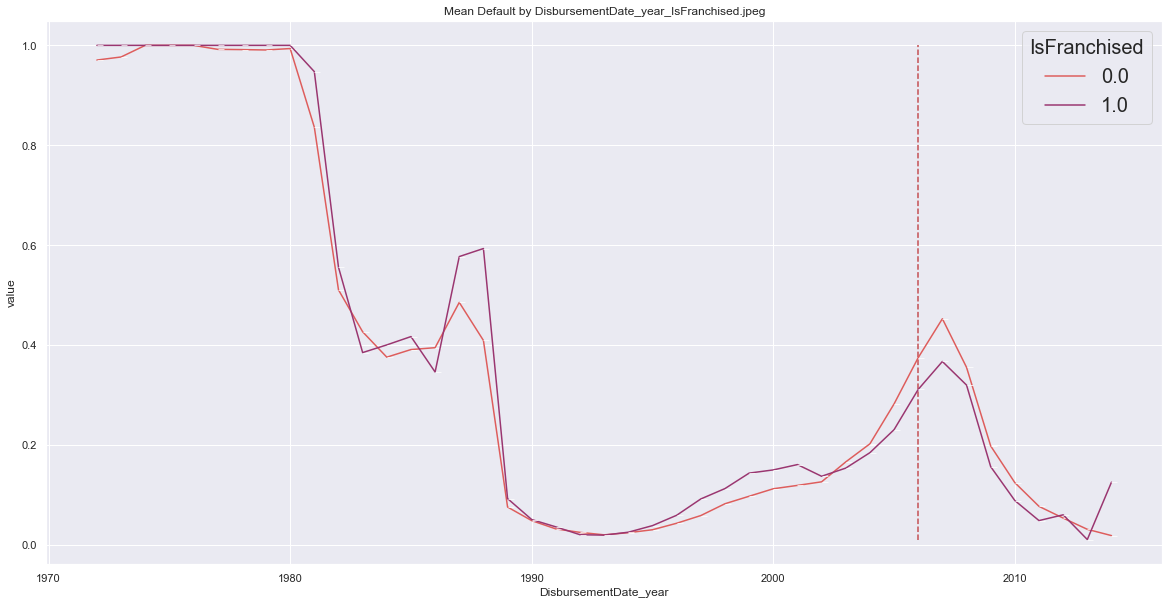

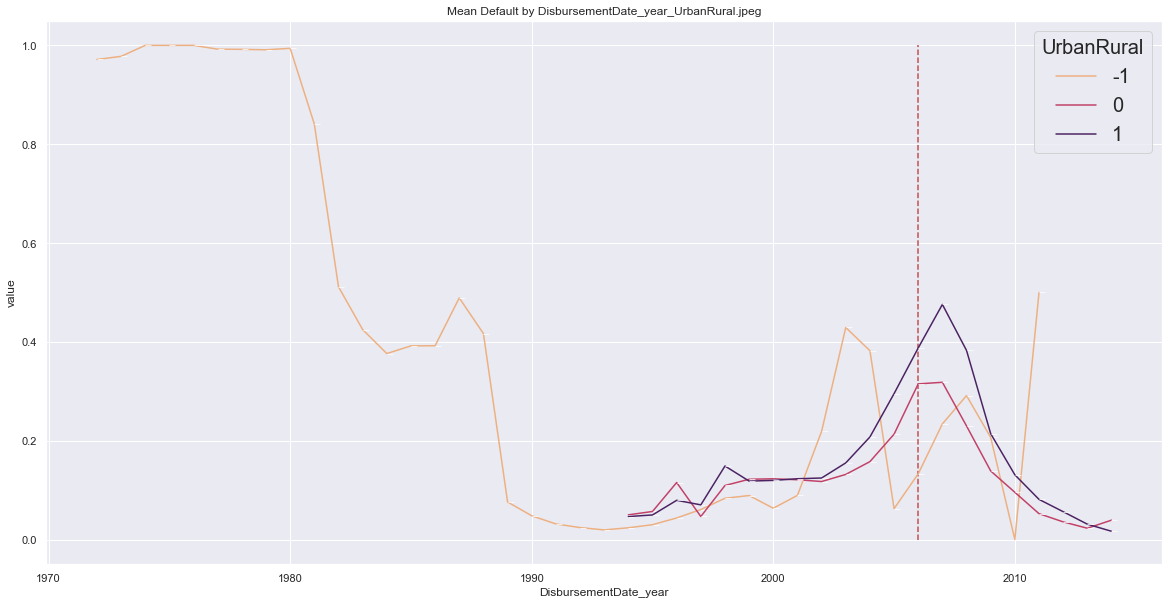

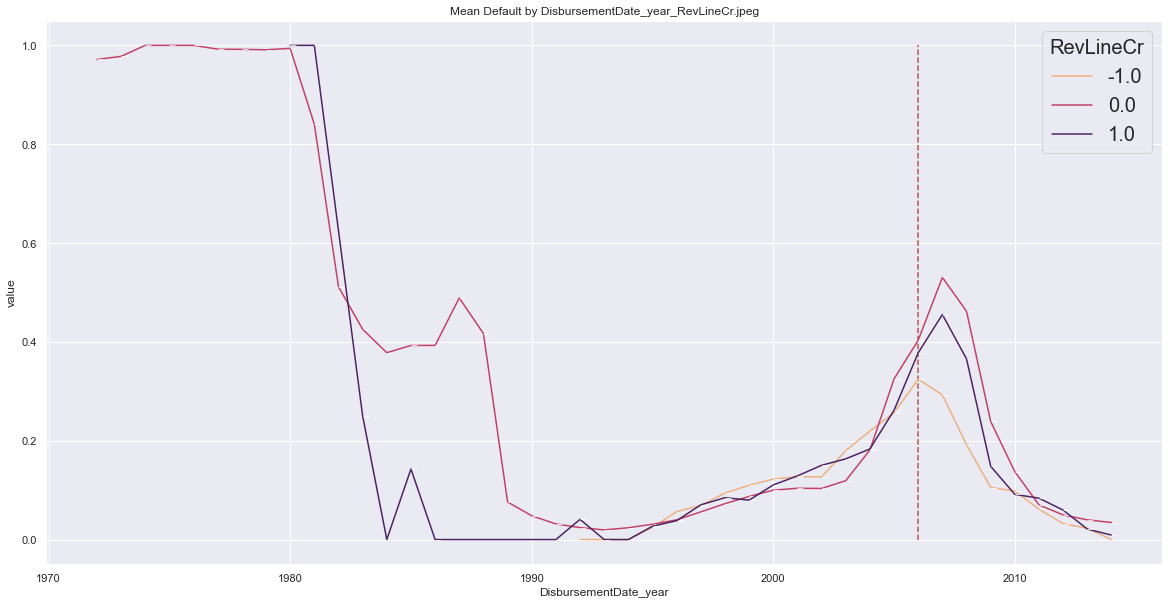

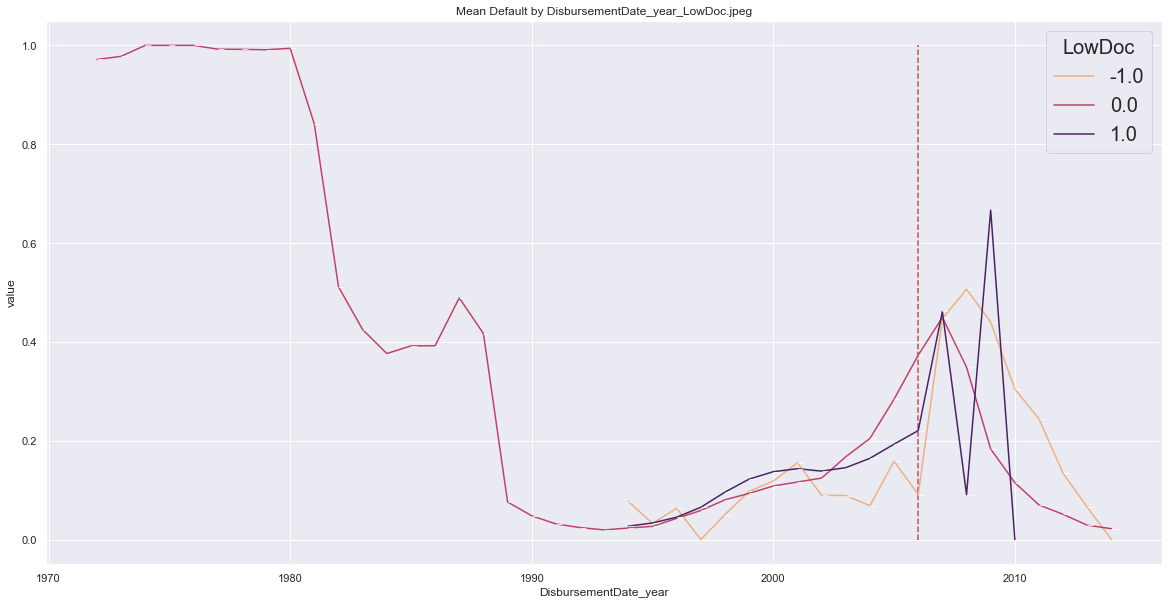

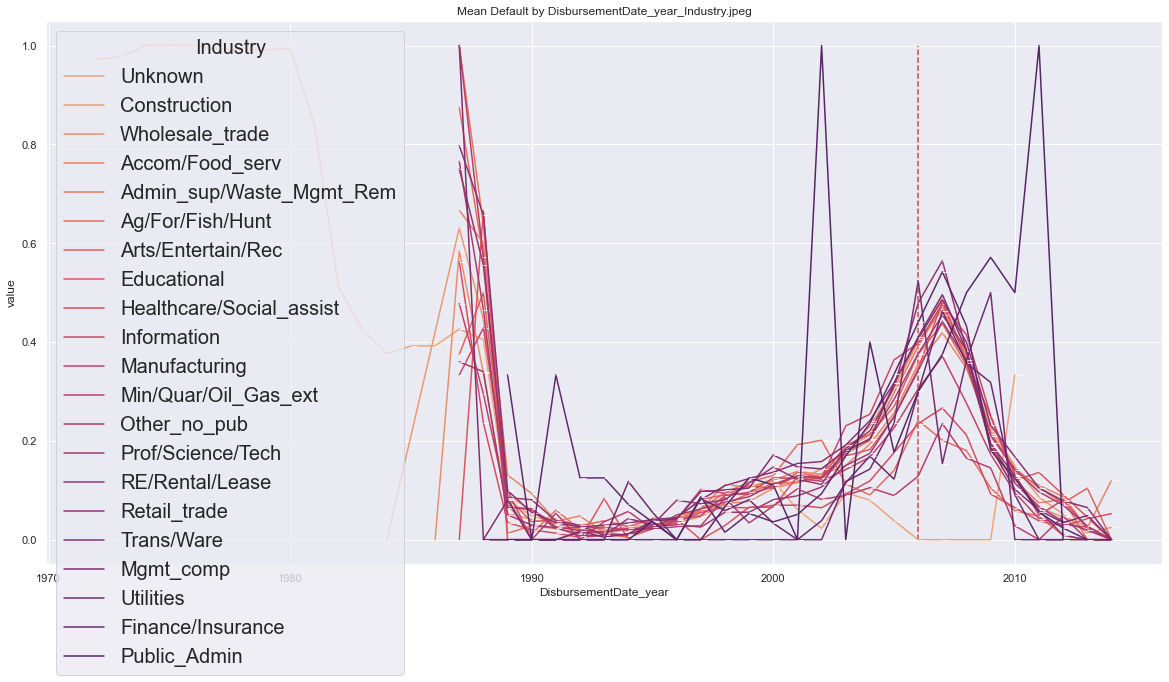

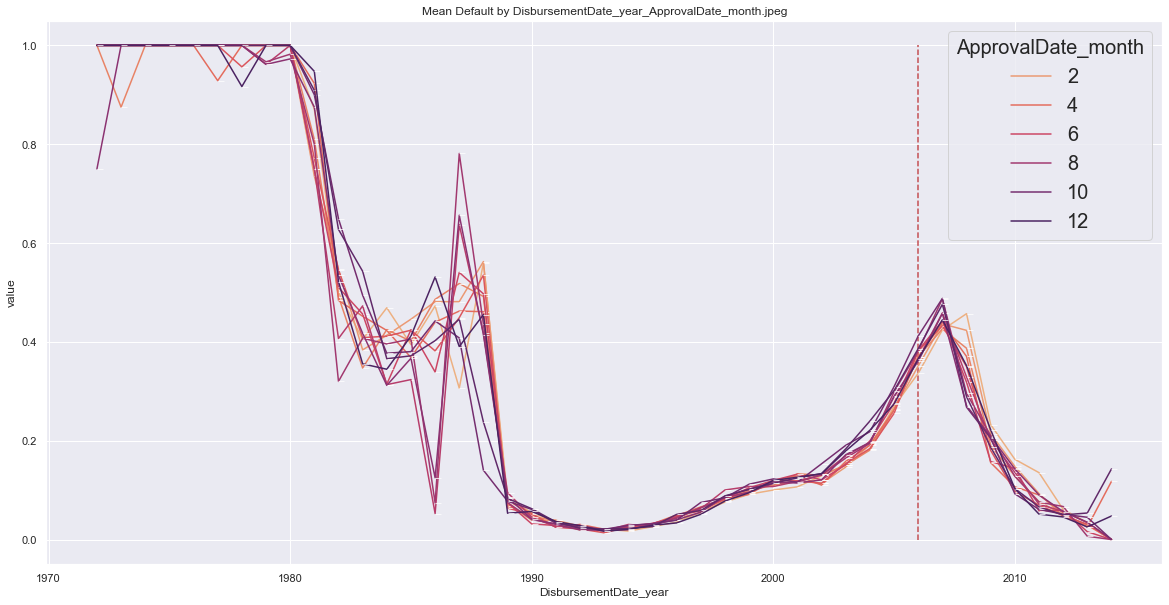

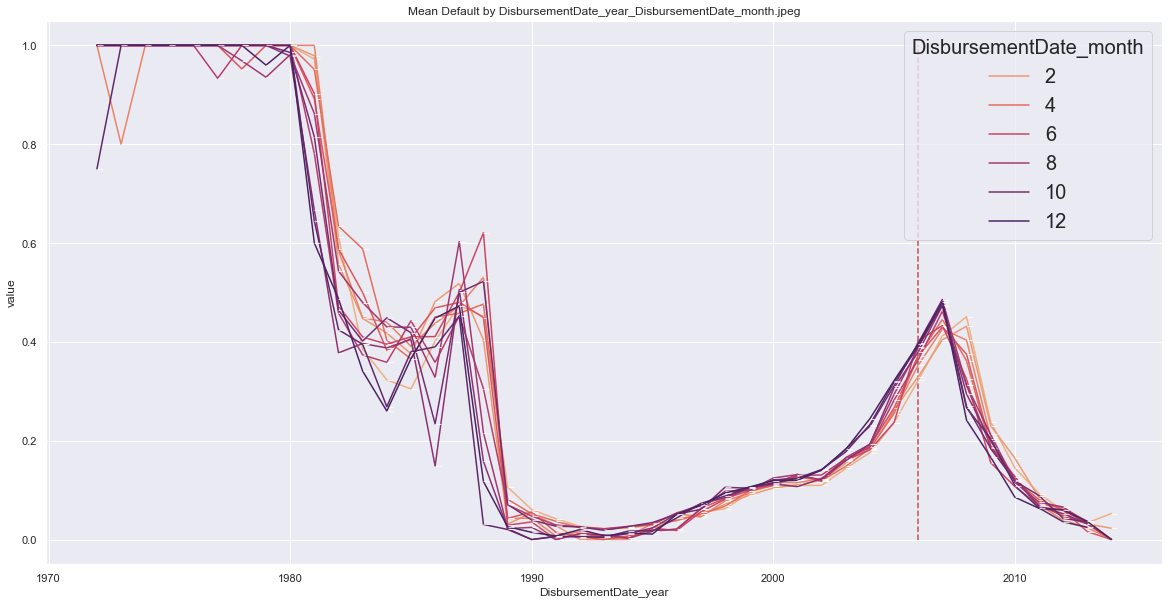

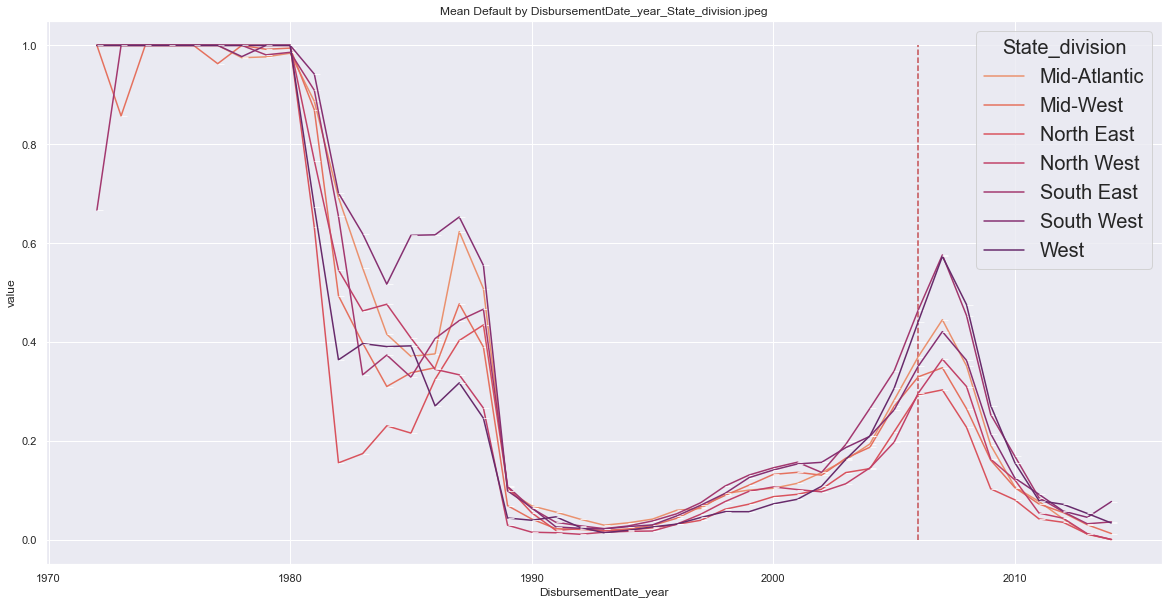

In [29]:
mean_default_hue_disbursementyear(df_copy, hue_cols=obj_features, year_col='DisbursementDate_year')